In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day1\US_Heart_Patients.csv')

In [3]:
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isna().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.fillna(method ='ffill',inplace =True)


In [7]:
y = df.TenYearCHD
x = df.drop(columns ='TenYearCHD')

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
%%time
dtc = DecisionTreeClassifier(max_depth=3,min_samples_split =10)
dtc.fit(x,y)

Wall time: 13 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import imblearn
import lightgbm

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


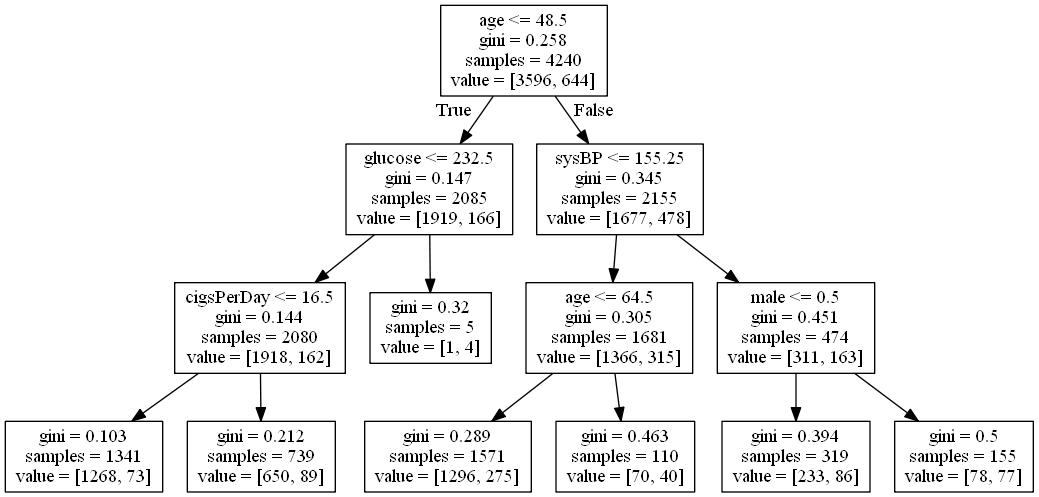

In [11]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = x.columns
# Create DOT data
dot_data = export_graphviz(dtc, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Decision tree classifier for prediction

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3,random_state =1)


In [13]:
dtcc = DecisionTreeClassifier()
dtcc.fit(X_train,y_train)
ytrain_prob = dtcc.predict_proba(X_train)[:,1]
ytrainpred = dtcc.predict(X_train)


In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

accuracy score on train 1.0
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  1.0


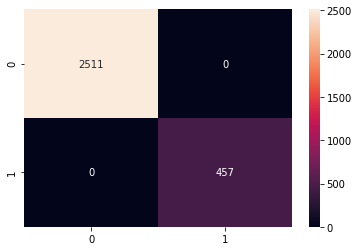

In [15]:
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_train,ytrain_prob))


accuracy score on train 0.7665094339622641
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.5400404149929766


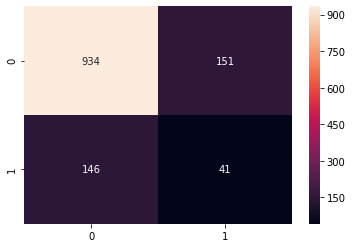

In [16]:
#X_train, X_test, y_train, y_test
ytest_prob = dtcc.predict_proba(X_test)[:,1]
ytestpred = dtcc.predict(X_test)
print('accuracy score on train',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_test,ytest_prob))

## Randomised search

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
%%time
from scipy.stats import randint
param_dist = {"max_depth": [2,3, 4,5,6],
              "max_features": randint(1, 10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              "criterion": ["gini", "entropy"]}
clf = RandomizedSearchCV(dtcc, param_dist, random_state=0,cv =5,n_iter=1000,scoring ='roc_auc',n_jobs =-1)
search = clf.fit(X_train, y_train)
search.best_params_

Wall time: 22.2 s


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 8,
 'min_samples_leaf': 19,
 'min_samples_split': 47}

In [87]:
search.score(X_train,y_train)##X_train, X_test, y_train, y_test


0.7307483832624417

In [88]:
search.score(X_test,y_test)

0.7089800142931071

In [89]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007394,0.000799,0.004999,6.641573e-07,gini,2,4,68,11,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.620999,0.659341,0.628215,0.626067,0.685817,0.644088,0.024834,491
1,0.010193,0.000979,0.004998,6.320333e-04,entropy,4,5,88,72,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.667151,0.672711,0.630760,0.672836,0.616206,0.651933,0.023770,334
2,0.006995,0.000002,0.004998,1.311085e-06,gini,2,2,40,89,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.625882,0.637515,0.533994,0.646436,0.565562,0.601878,0.044178,895
3,0.006797,0.000748,0.013193,1.062316e-02,gini,2,2,38,27,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.639340,0.493959,0.603629,0.639256,0.568966,0.589030,0.054236,939
4,0.007795,0.000748,0.004997,6.324098e-04,entropy,2,5,81,71,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.651519,0.624621,0.669204,0.643470,0.599328,0.637628,0.023917,621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.013392,0.004078,0.004597,4.892790e-04,gini,5,4,95,48,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.656861,0.666172,0.672625,0.656364,0.653069,0.661018,0.007258,143
996,0.006396,0.000489,0.006397,3.319470e-03,entropy,2,1,33,27,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.526085,0.604647,0.495269,0.597413,0.500000,0.544683,0.047245,994
997,0.009794,0.001719,0.005197,3.995441e-04,entropy,6,2,24,37,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.593844,0.629958,0.630456,0.610810,0.667681,0.626550,0.024642,769
998,0.010993,0.003519,0.004799,3.996612e-04,entropy,3,4,35,86,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.658270,0.657988,0.665977,0.658016,0.603684,0.648787,0.022758,406


accuracy score on train 0.8497304582210242
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.730200683731189


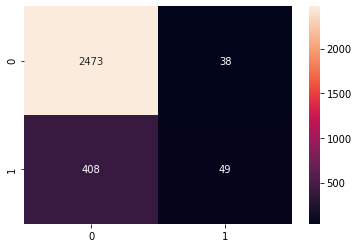

In [90]:

dtr = DecisionTreeClassifier(**search.best_params_)
dtr.fit(X_train,y_train)
ytrain_prob = dtr.predict_proba(X_train)[:,1]
ytrainpred = dtr.predict(X_train)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_train,ytrain_prob))




accuracy score on train 0.8466981132075472
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.7082702875871756


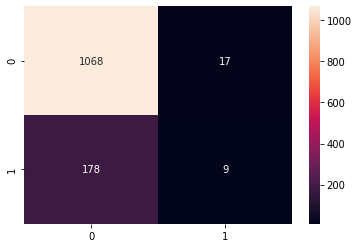

In [91]:
ytest_prob = dtr.predict_proba(X_test)[:,1]
ytestpred = dtr.predict(X_test)
print('accuracy score on train',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_test,ytest_prob))

## Gridsearch

In [35]:

%%time
dtg = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
param_dist = {"max_depth": [2,3,4,5,6],
              "min_samples_split" :[2,3,4,5,6,7,8,9,10],
              "max_features": [1,2,3,4],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}
clf = GridSearchCV(dtcc, param_dist,cv =5,scoring ='roc_auc',n_jobs =-1)
search = clf.fit(X_train, y_train)
search.best_params_

Wall time: 1min 9s


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 5}

In [36]:
search.score(X_train,y_train)##X_train, X_test, y_train, y_test


0.6964363365742158

In [37]:
search.score(X_test,y_test)

0.6936642105522561

In [38]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007795,0.000399,0.005397,0.000800,gini,2,1,1,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.589769,0.532674,0.601886,0.623823,0.585154,0.586661,0.030131,3048
1,0.007794,0.001599,0.011194,0.012393,gini,2,1,1,3,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.613113,0.567209,0.568021,0.594249,0.566076,0.581734,0.018897,3097
2,0.006795,0.000400,0.005197,0.000400,gini,2,1,1,4,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.543847,0.560746,0.574463,0.596318,0.509982,0.557071,0.029150,3223
3,0.006196,0.000399,0.004197,0.000979,gini,2,1,1,5,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.572816,0.667417,0.561374,0.609102,0.568933,0.595928,0.039348,2894
4,0.006996,0.000002,0.004997,0.000632,gini,2,1,1,6,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.588393,0.614726,0.554456,0.575818,0.526050,0.571888,0.030093,3170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.022786,0.021596,0.007596,0.003553,entropy,6,4,9,6,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.658620,0.636768,0.628237,0.651964,0.592301,0.633578,0.023271,1253
3236,0.011792,0.000400,0.005198,0.000399,entropy,6,4,9,7,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.701593,0.698608,0.623744,0.620715,0.574439,0.643820,0.049173,622
3237,0.023585,0.014885,0.006198,0.001938,entropy,6,4,9,8,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.609180,0.652239,0.640796,0.580699,0.608861,0.618355,0.025471,2159
3238,0.012192,0.001166,0.004997,0.000632,entropy,6,4,9,9,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.656992,0.627414,0.613773,0.660391,0.659571,0.643628,0.019329,632


accuracy score on train 0.8514150943396226
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.7298447008218542


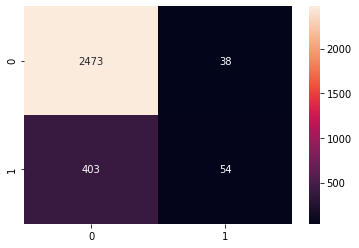

In [39]:
dtr = DecisionTreeClassifier(**search.best_params_)
dtr.fit(X_train,y_train)
ytrain_prob = dtr.predict_proba(X_train)[:,1]
ytrainpred = dtr.predict(X_train)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_train,ytrain_prob))

accuracy score on train 0.8466981132075472
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.705369772542448


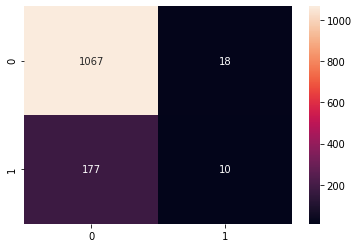

In [40]:
ytest_prob = dtr.predict_proba(X_test)[:,1]
ytestpred = dtr.predict(X_test)
print('accuracy score on train',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_test,ytest_prob))